  ## Corpus Linguistics with Python Project
### SoSe 2024
# Sotirios Gkosdis

For the final project I desided and downloaded the mythology book from the online open source library "The Gutenberg Project".


    We start by downloading the libraries we want to use as a first idea and more libraries will be imported according to the need that each step has.  Also we have created a directory with our files and stored them there. As datasets I downloaded as raw and used two books from "The Gutenberg Project" with more than enough tokens. The critirion for the selection of two relegious texts was because I thought that nobody else would use them as datasets. 

In [62]:
#we import the libraries that are needed for the tasks
import os
import nltk
from relegions import *
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/soteresnkosdes/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/soteresnkosdes/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# 1. Corpora Statistics


In [2]:
directory = 'relegions/' # give the directory of the files 

#explain that i need to count one for every document that ends with (.txt) in the directory for which we use the listdir funtion
#and sum it.
num_documents = sum(1 for doc in os.listdir(directory) if doc.endswith('.txt'))
print("We have ", num_documents , " documents in our directory.") # We then print it.


We have  2  documents in our directory.


In [5]:
#first I create a function for the local files and then for global. 
txt_orthodoxy= "relegions/orthodoxy.txt" # create a variale with the text directory for orthodoxy text
txt_mythology= "relegions/mythology.txt" # create a variale with the text directory for mythology text


def tokenize_locally(file_path):
    with open (file_path, "r", encoding="utf-8") as file: #we open the file an read it
        file_data = file.read() #we then create a variable to to use it later in order to tokenize our files
        tokens = nltk.word_tokenize(file_data)
        return tokens , file_data #we return both the tokens from the function and the data variable that we have  for later use

    
# Globally now    
def tokenize_globally(directory): #our argument is the directory from above
    global_data = "" # new variable as an empty string
    for filename in os.listdir(directory):  # we now create a loop as from before and join the files together following 
        if filename.endswith('.txt'):       #the same steps
            filepath = os.path.join(directory, filename)             
            with open (filepath, "r", encoding="utf-8") as both_files:
                global_data += both_files.read() # we add the data to the empty string from before
    global_tokens = nltk.word_tokenize(global_data) #tokenize the data and return them 
    return global_tokens, global_data
    
        
# we create variables in which we apply the functions, to use them in printing as well for later.        
orth_tokenizer, orth_data = tokenize_locally(txt_orthodoxy)
myth_tokenizer, myth_data = tokenize_locally(txt_mythology)
global_tokenizer, global_data = tokenize_globally(directory)
#we print the lenght of the files 
print("The orthodoxy file has ", len(orth_tokenizer), "tokens.")
print("The mythology file has ", len(myth_tokenizer), "tokens.")
print("Both files have ", len(global_tokenizer), "tokens in total.")


The orthodoxy file has  75001 tokens.
The mythology file has  129810 tokens.
Both files have  204811 tokens in total.


In [6]:
#we create a function for line counting
def line_counting(data): 
    lines= data.split("\n") #from the data we have we split the lines using the split method and the change line with "\n"
    return lines

# we create new variables and apply the function we created
lines_orth = line_counting(orth_data)
lines_myth = line_counting(myth_data)
lines_global = line_counting(global_data)

#we print the results
print("The mythology text has : ", len(lines_myth), " lines")
print("The orthodoxy text has : ", len(lines_orth), " lines")
print("The texts in a global level have: ", len(lines_global), " lines")

The mythology text has :  12213  lines
The orthodoxy text has :  5882  lines
The texts in a global level have:  18094  lines


# 2. Word Frequency

for Word frequency I did a little datacleaning in order not to remove the punctuation and take into consideration not 
#the tokens but the words, as i understood from the explanation.

[('the', 4176), ('of', 2345), ('a', 1735), ('is', 1666), ('to', 1591), ('and', 1540), ('that', 1381), ('it', 1302), ('in', 1228), ('i', 794), ('not', 724), ('but', 649), ('be', 619), ('as', 600), ('for', 570), ('he', 568), ('was', 505), ('this', 483), ('or', 437), ('we', 428), ('if', 425), ('all', 420), ('are', 396), ('have', 367), ('with', 365), ('man', 364), ('they', 347), ('one', 344), ('you', 343), ('an', 303)]


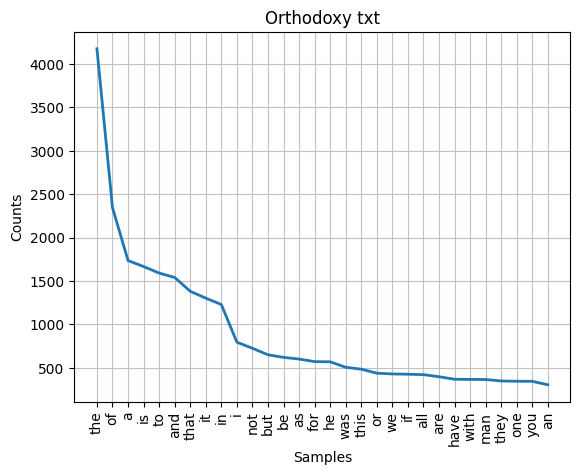

	
	
	
[('the', 8758), ('of', 5273), ('and', 3956), ('to', 3229), ('in', 2094), ('his', 1935), ('a', 1859), ('was', 1611), ('he', 1191), ('with', 1103), ('her', 1091), ('which', 1008), ('by', 964), ('that', 831), ('as', 774), ('him', 748), ('their', 704), ('at', 682), ('were', 680), ('for', 672), ('on', 660), ('who', 575), ('had', 552), ('this', 526), ('she', 514), ('but', 494), ('they', 487), ('from', 481), ('it', 437), ('all', 408)]


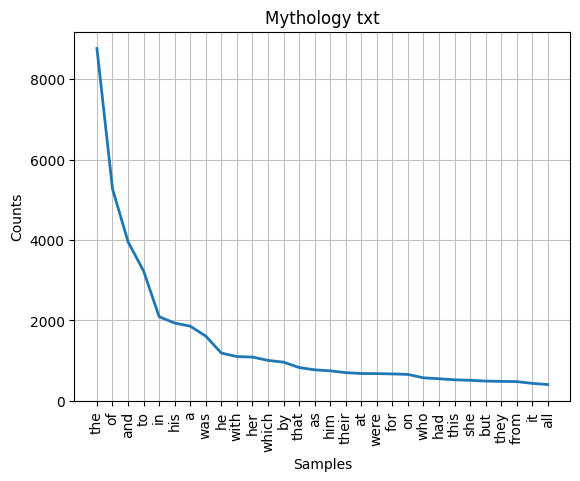

	
	
	
[('the', 12934), ('of', 7618), ('and', 5496), ('to', 4820), ('a', 3594), ('in', 3322), ('that', 2212), ('his', 2202), ('was', 2116), ('is', 2061), ('he', 1759), ('it', 1739), ('with', 1468), ('as', 1374), ('which', 1256), ('by', 1247), ('for', 1242), ('but', 1143), ('her', 1123), ('this', 1009), ('at', 954), ('not', 952), ('be', 942), ('on', 895), ('were', 865), ('him', 848), ('their', 844), ('they', 834), ('all', 828), ('i', 811)]


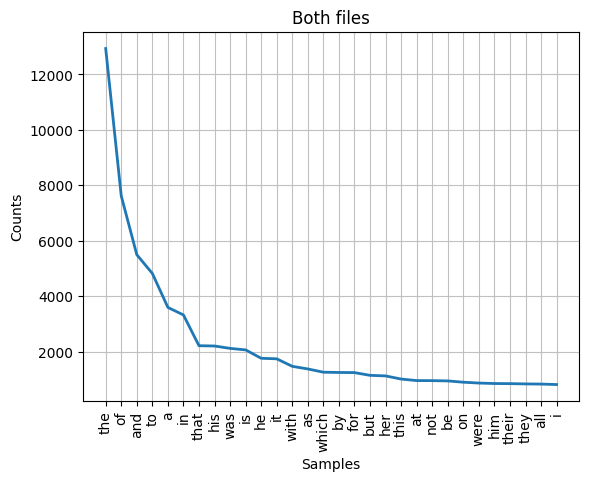

In [109]:
#import the freqDist for frequence purposes adn re library for the data-cleaning
from nltk.probability import FreqDist
import re

#we create a function for the text data in order to remove puctuation
def preprocessing(txt_data):
    txt_data = re.sub(r'[^\w\s]', '', txt_data) #with this regex we remove the punctuation while keeping words and spaces
    return txt_data
#we create a frequency function
def frequency(txt_data, title):
    txt_data = preprocessing(txt_data) # we apply the data-cleaning for the data from before
    txt_data =txt_data.lower().split() # before spliting we apply the .lower() in order to match everything and avaid mistakes
    freq = FreqDist(txt_data) # we apply the FreqDist from the library 
    print(freq.most_common(30)) # print the results 
    freq.plot(30,title=title) #use a simple plot to make it more visual
    print("\t")
    print("\t")
    print("\t")
    return frequency

# we print the plots and create their titles 
fdist_orth = frequency(orth_data, "Orthodoxy txt")
fdist_myth = frequency(myth_data, "Mythology txt")
fdist_glob = frequency(global_data, "Both files")
#because it looks terrible I have there are some plots in the next cells that are looking better visually. I tried to do a 
#wordcloud but it is still not working in my computer.

# 3.Type-Token-Ratio

In [75]:
#we create a function for the type-token-ratio
def type_token_ratio(tokens):
    types = set(tokens) # as instacted we set the tokens into sets and then we return the asked devision
    return len(tokens)/ len(types)

#we apply the function and prin the results
myth_ratio = type_token_ratio(myth_tokenizer)
print("The mythology token ratio is: ", myth_ratio)

orth_ratio = type_token_ratio(orth_tokenizer)
print("The orthodoxy token ratio is: ", orth_ratio)


global_ratio = type_token_ratio(global_tokenizer)
print("The global token ratio is: ", global_ratio)


The mythology token ratio is:  10.879148508213207
The orthodoxy token ratio is:  9.768299036207345
The global token ratio is:  13.022890570356711


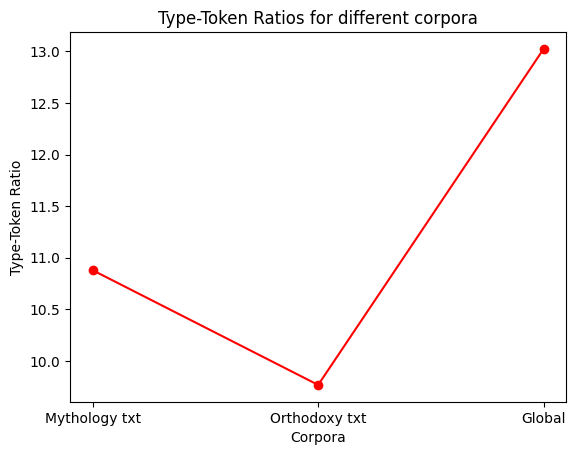

In [114]:
#we import matplotilib.pyplot for the ploting here
import matplotlib.pyplot as plt
# we set two lists one of the ratios and an other one with the names of the texts
ratios = [myth_ratio, orth_ratio, global_ratio]
labels = ['Mythology txt', 'Orthodoxy txt', 'Global']

# we plot the labels and the ratios while explaining the way we want our plot to be and then we print it 
plt.plot(labels, ratios, color='red', marker='o', linestyle='-')
plt.xlabel('Corpora')
plt.ylabel('Type-Token Ratio')
plt.title('Type-Token Ratios for different corpora')
plt.show()

# 4. N-gram Analysis

In [154]:
# we import the ngrams function 
from nltk.util import ngrams
# we create three functions. One for each dataset the arguments are the same the text and the number of wordsto apply
def orth_ngrams(text, n): 
#create a new variable ich which we apply the ngram function to the tokens and transform it to a list
    words_orth = list(ngrams(orth_tokenizer, n)) 
    for word in words_orth[:20]: # a for loop in order to print the results.
        print(word) # print the results 
    return (orth_ngrams) # we returnt he outcome

# the same exact principle is followed for the other functions for the other datasets
# i print the first 20 words/ word-ngrams in order to proov that the code is working so its only for viewing purposes.
def myth_ngrams(text, n): 
    words_myth = list(ngrams(myth_tokenizer, n))
    for word in words_myth[:20]:
        print(word)
    return (myth_ngrams)

def global_ngrams(text, n): 
    words_global = list(ngrams(global_tokenizer, n))
    for word in words_global[:20]:
        print(word)
    return (global_ngrams)


## Unigrams

In [155]:
#for unigrams we declare that n is one
n = 1
#and print
print("The unigrams for the orthodoxy text:")
print(orth_ngrams(orth_data, n))
print("\t")
print("The unigrams for the mythology text:")
print(myth_ngrams(myth_data, n))
print("\t")
print("The unigrams globally:")
print(global_ngrams(myth_data, n))


The unigrams for the orthodoxy text:
('\ufeffThe',)
('Project',)
('Gutenberg',)
('eBook',)
('of',)
('Orthodoxy',)
('This',)
('ebook',)
('is',)
('for',)
('the',)
('use',)
('of',)
('anyone',)
('anywhere',)
('in',)
('the',)
('United',)
('States',)
('and',)
<function orth_ngrams at 0x1164a40d0>
	
The unigrams for the mythology text:
('\ufeffThe',)
('Project',)
('Gutenberg',)
('eBook',)
('of',)
('Myths',)
('and',)
('Legends',)
('of',)
('Ancient',)
('Greece',)
('and',)
('Rome',)
('This',)
('ebook',)
('is',)
('for',)
('the',)
('use',)
('of',)
<function myth_ngrams at 0x1164a4670>
	
The unigrams globally:
('\ufeffThe',)
('Project',)
('Gutenberg',)
('eBook',)
('of',)
('Orthodoxy',)
('This',)
('ebook',)
('is',)
('for',)
('the',)
('use',)
('of',)
('anyone',)
('anywhere',)
('in',)
('the',)
('United',)
('States',)
('and',)
<function global_ngrams at 0x1164a4c10>


## Bigrams

In [156]:
#for bigrams we diclare that n is 2 
n = 2

#and print
print("The bigrams for the orthodoxy text:")
print(orth_ngrams(orth_data, n))
print("\t")
print("The bigrams for the mythology text:")
print(myth_ngrams(myth_data, n))
print("\t")
print("The bigrams globally:")
print(global_ngrams(myth_data, n))

The bigrams for the orthodoxy text:
('\ufeffThe', 'Project')
('Project', 'Gutenberg')
('Gutenberg', 'eBook')
('eBook', 'of')
('of', 'Orthodoxy')
('Orthodoxy', 'This')
('This', 'ebook')
('ebook', 'is')
('is', 'for')
('for', 'the')
('the', 'use')
('use', 'of')
('of', 'anyone')
('anyone', 'anywhere')
('anywhere', 'in')
('in', 'the')
('the', 'United')
('United', 'States')
('States', 'and')
('and', 'most')
<function orth_ngrams at 0x1164a40d0>
	
The bigrams for the mythology text:
('\ufeffThe', 'Project')
('Project', 'Gutenberg')
('Gutenberg', 'eBook')
('eBook', 'of')
('of', 'Myths')
('Myths', 'and')
('and', 'Legends')
('Legends', 'of')
('of', 'Ancient')
('Ancient', 'Greece')
('Greece', 'and')
('and', 'Rome')
('Rome', 'This')
('This', 'ebook')
('ebook', 'is')
('is', 'for')
('for', 'the')
('the', 'use')
('use', 'of')
('of', 'anyone')
<function myth_ngrams at 0x1164a4670>
	
The bigrams globally:
('\ufeffThe', 'Project')
('Project', 'Gutenberg')
('Gutenberg', 'eBook')
('eBook', 'of')
('of', 'O

## Trigrams

In [153]:
#for trigrams we declare that n is 3 
n = 3

#we print
print("The trigrams for the orthodoxy text:")
print(orth_ngrams(orth_data, n))
print("\t")
print("The trigrams for the mythology text:")
print(myth_ngrams(myth_data, n))
print("\t")
print("The trigrams globally:")
print(global_ngrams(myth_data, n))

The trigrams for the orthodoxy text:
('\ufeffThe', 'Project', 'Gutenberg')
('Project', 'Gutenberg', 'eBook')
('Gutenberg', 'eBook', 'of')
('eBook', 'of', 'Orthodoxy')
('of', 'Orthodoxy', 'This')
('Orthodoxy', 'This', 'ebook')
('This', 'ebook', 'is')
('ebook', 'is', 'for')
('is', 'for', 'the')
('for', 'the', 'use')
('the', 'use', 'of')
('use', 'of', 'anyone')
('of', 'anyone', 'anywhere')
('anyone', 'anywhere', 'in')
('anywhere', 'in', 'the')
('in', 'the', 'United')
('the', 'United', 'States')
('United', 'States', 'and')
('States', 'and', 'most')
('and', 'most', 'other')
<function orth_ngrams at 0x1164a4670>
	
The trigrams for the mythology text:
('\ufeffThe', 'Project', 'Gutenberg')
('Project', 'Gutenberg', 'eBook')
('Gutenberg', 'eBook', 'of')
('eBook', 'of', 'Myths')
('of', 'Myths', 'and')
('Myths', 'and', 'Legends')
('and', 'Legends', 'of')
('Legends', 'of', 'Ancient')
('of', 'Ancient', 'Greece')
('Ancient', 'Greece', 'and')
('Greece', 'and', 'Rome')
('and', 'Rome', 'This')
('Rome', 

# 5.Concordance

In [104]:
#we imported the Text function from the ntlk library
from nltk.text import Text

#we create a function that takes as arguments the tokens and the user input
def concordance(tokens, user_input):
    texted = Text(tokens)    #new variable that applies the text function to the tokens 
    texted.concordance(user_input) # then we apply the concordance function from the Text that we imported to the user input
    return concordance

# we ask for the user to give his input
## for the purposes of checking i used the word "greek" because it exists in both texts
user_input  = input("Please enter your word here: ")

# we print and apply our function 
print("Orthodoxy.txt:")
concordance(orth_tokenizer, user_input)
print("\t")
print("Mythology.txt:")
concordance(myth_tokenizer, user_input)
print("\t")
print("For both texts globally:")
concordance(global_tokenizer, user_input)


Please enter your word here:  greek


Orthodoxy.txt:
Displaying 5 of 5 matches:
unconsciously assuming a standard of Greek sculpture . They are appealing to th
olution which seeks to destroy the [ Greek : meson ] or balance of Aristotle . 
ever . But the great truism of the [ Greek : meson ] remains for all thinking m
not a beast , but a broken god . The Greek had spoken of men creeping on the ea
u merely bear it , you do not grin . Greek heroes do not grin ; but gargoyles d
	
Mythology.txt:
Displaying 25 of 94 matches:
* The want of an interesting work on Greek and Roman mythology , suitable for t
rk , a picture , as it were , of old Greek life ; its customs , its superstitio
 { vi } AUGURS , 196 FESTIVALS , 196 GREEK FESTIVALS -- ELEUSINIAN MYSTERIES , 
habitants , which , according to the Greek custom of paying reverence to all go
ally bore the impress of its ancient Greek source . As the primitive Celts , ho
 with the vivid imagination of their Greek neighbours , leaves its mark on the 
s dominions , his career as a ru

<function __main__.concordance(tokens, user_input)>

# 6. Collocations/ Multiword Expressions

In [107]:
# we dont need ti import anything since its imported from before 
# we follow the same steps creating a function in which we take only the tokens as argument
def collocations(tokens):
    texted = Text(tokens) #again the same type of variable created
    texted.collocations() # we apply the collocations method
    return collocations

# we print and we exucute the function the same way as before
print("Orthodoxy.txt:")
print(collocations(orth_tokenizer))
print("\t")
print("Mythology.txt:")
print(collocations(myth_tokenizer))
print("\t")
print("For both texts globally:")
print(collocations(global_tokenizer))

Orthodoxy.txt:
Project Gutenberg™; Project Gutenberg; United States; Literary
Archive; Gutenberg™ electronic; electronic works; Gutenberg Literary;
Archive Foundation; fairy tales; _Reprinted_
...................................; set forth; Inner Light; one
thing; nineteenth century; Bernard Shaw; electronic work; modern
world; Gutenberg™ License; fairy tale; Thou shalt
<function collocations at 0x11368de50>
	
Mythology.txt:
Project Gutenberg™; lower world; Project Gutenberg; later times; took
place; United States; set sail; Literary Archive; Gutenberg™
electronic; electronic works; Gutenberg Literary; Archive Foundation;
Golden Fleece; one day; old man; presiding deity; single combat;
homeward voyage; one occasion; usually represented
<function collocations at 0x11368de50>
	
For both texts globally:
Project Gutenberg™; Project Gutenberg; United States; Literary
Archive; Gutenberg™ electronic; electronic works; Gutenberg Literary;
lower world; Archive Foundation; later times; took plac

# 7. Unique-Words

In [158]:
#we create a function that stores unique words 
def unique_words(txt_data, new_file): #the arguments that we have are the data and the file that we are going to create in here
    txt_data = preprocessing(txt_data) # we redo the steps for the preprocessing 
    words =txt_data.lower().split() # and again the lower and spliting 
    unique_words = set(words) # we create a new variable to store the set of the data from before.
    
    with open (new_file, 'w', encoding='utf-8') as f: # now for turning the results to output filea we use the 'write' method
        for word in sorted(unique_words): # we create a for loop for sorting the words alphabetically
            f.write(word+ " ") # and now we export them to the new files while seperating them with a space
    
    return unique_words # we return the results

# we set ne varables to exucute the function and name the output files properly as well as to use them later
unique_orth = unique_words(orth_data, 'unique_orthodoxy.txt')
unique_myth = unique_words(myth_data, 'unique_mythology.txt')
unique_both = unique_words(global_data, 'unique_both.txt')

#the unique words count is big and difficult to compare and check the results to see if the code worked properly.
#so my idea was to see if the output files look as expected and then see the number of the unique words each corpus contains
#then i add them both and check if the concatonation of those two local files is bigger than the global it means that
#according to logic and probabilities the code has worked, because it's possible same words to exist and be unique in both texts 
#but then when checked globally the are counted as not unique. This is also done in order to be visuable here in the notebook.

len_both = len(unique_both)

len_orth = len(unique_orth)

len_myth = len(unique_myth)

# we print the results in order to compare them 
print('The unique words that both texts have globally, are : ',len_both)
print('The unique words that both texts combined have, are : ',len_myth + len_orth)





The unique words that both texts have globally, are :  14420
The unique words that both texts combined have, are :  18088
